# PROJECT AKHIR KECERDASAN BUATAN
#### Kelompok 7 (A1-21)
#### Nama Anggota :
#### Rezky Nur Sya'ban         (2109106009) 
* #### Sebagai yang membuat dan mengatur bagian Evaluasi 🗃️
#### Andi Nur Fadilah          (2109106015)
* #### Sebagai yang membuat dan mengatur Data Collecting 🗂️, dan Data Visualization and Data Analyst 📊
#### Adlina Safa Sephia Putri  (2109106021)
* #### Sebagai yang membuat dan mengatur bagian bagian Preprocessing ⌛ dan Modelling 🔍
# ------------------------------------------------------------------------------------------
# Klasifikasi Jenis Sampah
* ## Penjelasan DataSet
#### Sumber Dataset Klasifikasi Sampah berasal dari Kaggle. Dataset tersebut berisikan gambar berbagai jenis sampah, namun kami hanya mengambil 3 jenis sampah, yaitu kaca, kertas, dan plastik. Data citra tersebut kemudian dibagi menjadi 3 kelas berdasarkan kondisinya, yaitu 'glass', 'paper', dan 'plastic' ke dalam folder yang terpisah, yakni train, test, dan val dengan perbandingan 7:1:2.

* ## Penjelasan Project
#### Projek akhir ini membahas mengenai model kecerdasan buatan dalam Pemilahan sampah yang melibatkan pemisahan sampah menurut cara penanganan atau pengolahannya. Penting untuk didaur ulang karena beberapa bahan dapat didaur ulang dan yang lainnya tidak.
# ------------------------------------------------------------------------------------------

# Mengimport Library yang Dibutuhkan

In [1]:
import splitfolders
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data Collecting

## A. Data Split
##### Memisahkan dataset ke dalam beberapa folder: train, test, dan val dengan porsi 70 : 10 : 20

In [ ]:
# splitfolders.ratio("Garbage classification/Garbage classification/", output="Klasifikasi Sampah", seed=1337, ratio=(.7, .1, .2), group_prefix=None)

## B. Memuat Dataset

### 1. Train

In [2]:
dataset_train = image_dataset_from_directory(
    'Klasifikasi Sampah/train/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (100, 100),
    shuffle = True, 
    seed = 47,
)

Found 1102 files belonging to 3 classes.


### 2. Validation

In [3]:
dataset_val = image_dataset_from_directory(
    'Klasifikasi Sampah/val/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (100, 100),
    shuffle = True, 
    seed = 47,
)

Found 157 files belonging to 3 classes.


### 3. Test

In [4]:
dataset_test = image_dataset_from_directory(
    'Klasifikasi Sampah/test/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (100, 100),
    shuffle = True, 
    seed = 47,
)

Found 318 files belonging to 3 classes.


# Data Preprocessing

## A. Augmentasi

In [5]:
train_dir = 'Klasifikasi Sampah/train/'
test_dir = 'Klasifikasi Sampah/test/'
val_dir = 'Klasifikasi Sampah/val/'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
val_datagen = ImageDataGenerator(
    rescale=1./255
)


In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    seed=0
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    seed=0
)

Found 1102 images belonging to 3 classes.
Found 157 images belonging to 3 classes.
Found 318 images belonging to 3 classes.


## B. Visualisasi Augmentasi

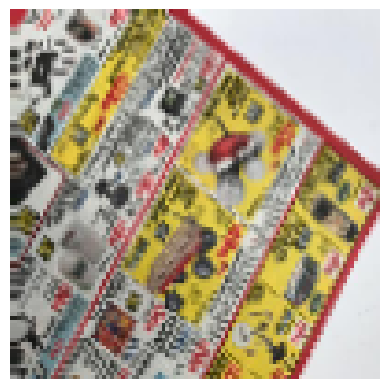

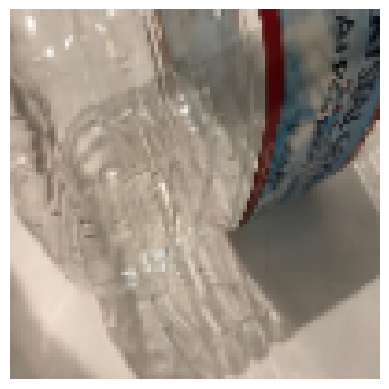

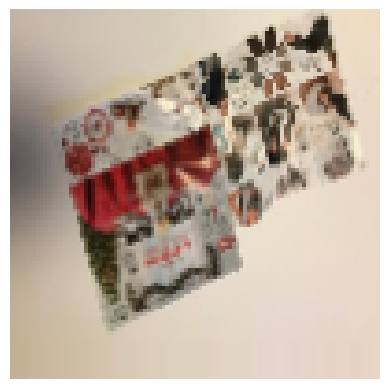

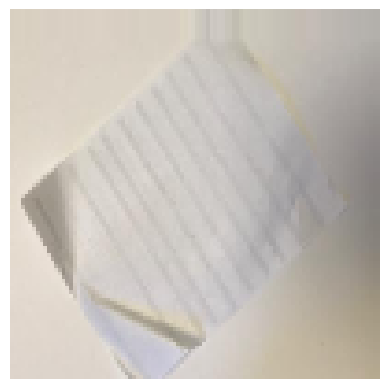

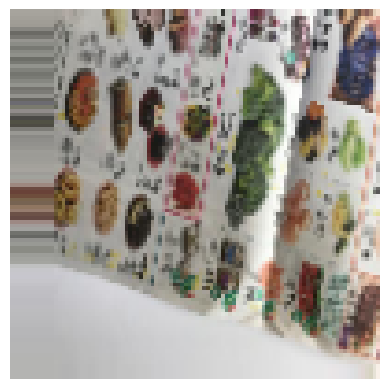

In [8]:
for _ in range(5):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

# Data Analyst dan Visualization

## A. Meta Data

In [9]:
nama_dataset = "Garbage Classification"
sumber = "https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification"
class_names = dataset_train.class_names

In [10]:
# for images, labels in dataset_train.take(1):
print("-------------------------- I N F O R M A S I    D A T A S E T --------------------------")
print("Nama Dataset    : ", nama_dataset)
print("Sumber          : ", sumber)
print("Kelas           : ", dataset_train.class_names)
print("Jumlah Kelas    : ", len(dataset_train.class_names))
print("Ukuran Gambar   : ", (images.shape))
print("----------------------------------------------------------------------------------------")

-------------------------- I N F O R M A S I    D A T A S E T --------------------------
Nama Dataset    :  Garbage Classification
Sumber          :  https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
Kelas           :  ['glass', 'paper', 'plastic']
Jumlah Kelas    :  3


NameError: name 'images' is not defined

## B. Visualisasi

## 1. Dataset (Preview)

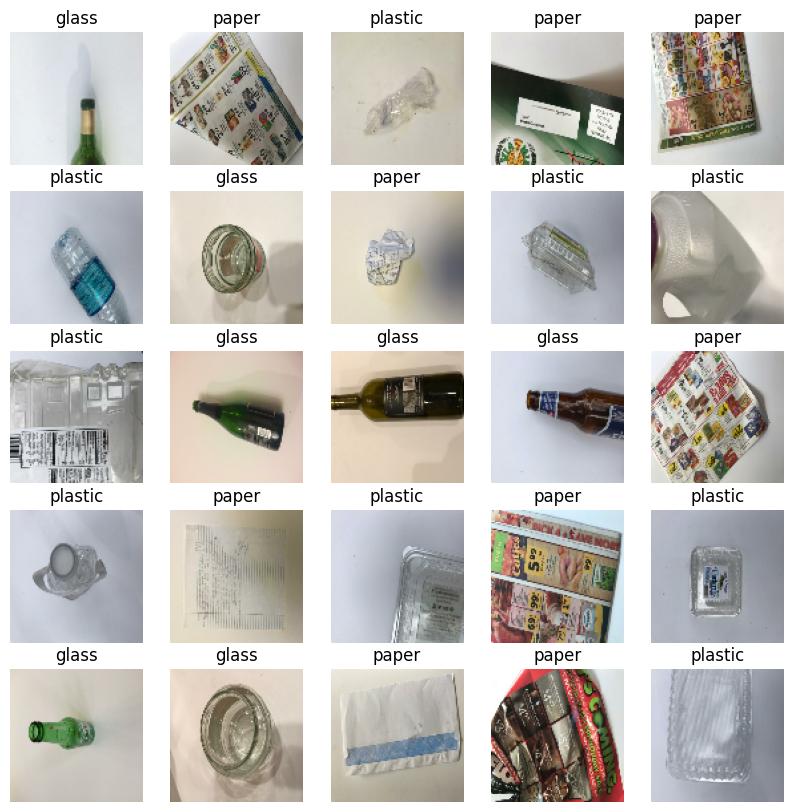

In [11]:
plt.figure(figsize = (10, 10))
for images, labels in dataset_train.take(1):
    for i in range (25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## 2. Train, Validation, Test

* ### Data Training

In [12]:
trainTemp = dataset_train.unbatch()
labels = []
for x, y in trainTemp:
    index = y
    labels.append(class_names[index])

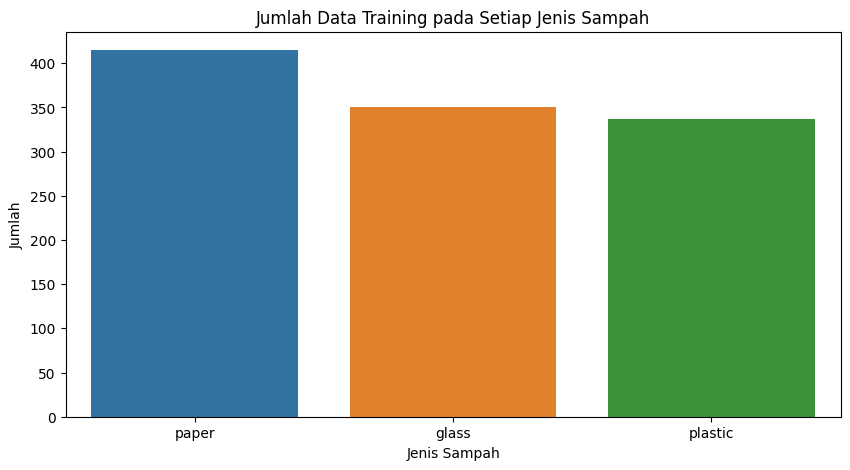

In [13]:
plt.figure(figsize = (10,5))

sns.countplot(x = labels)
plt.title("Jumlah Data Training pada Setiap Jenis Sampah")
plt.xlabel("Jenis Sampah")
plt.ylabel("Jumlah")
plt.show()

* ### Data Testing

In [14]:
testTemp = dataset_test.unbatch()
labels = []
for x, y in testTemp:
    index = y
    labels.append(class_names[index])

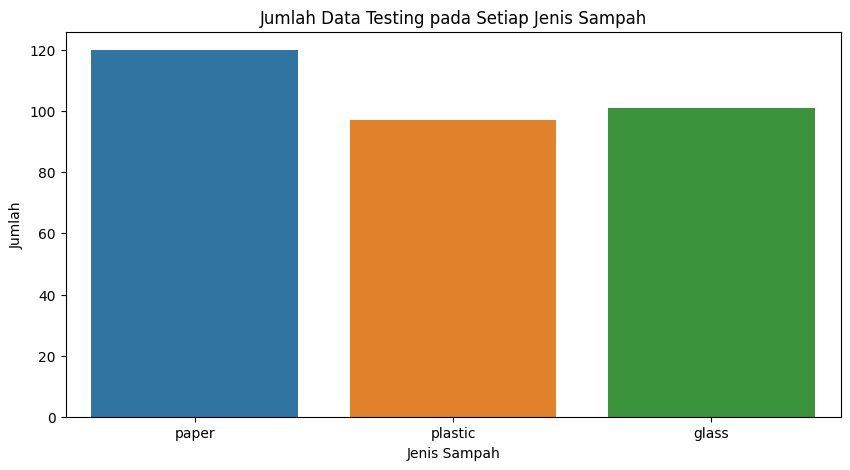

In [15]:
plt.figure(figsize = (10,5))

sns.countplot(x = labels)
plt.title("Jumlah Data Testing pada Setiap Jenis Sampah")
plt.xlabel("Jenis Sampah")
plt.ylabel("Jumlah")
plt.show()

* ### Data Validation

In [16]:
valTemp = dataset_val.unbatch()
labels = []
for x, y in valTemp:
    index = y
    labels.append(class_names[index])

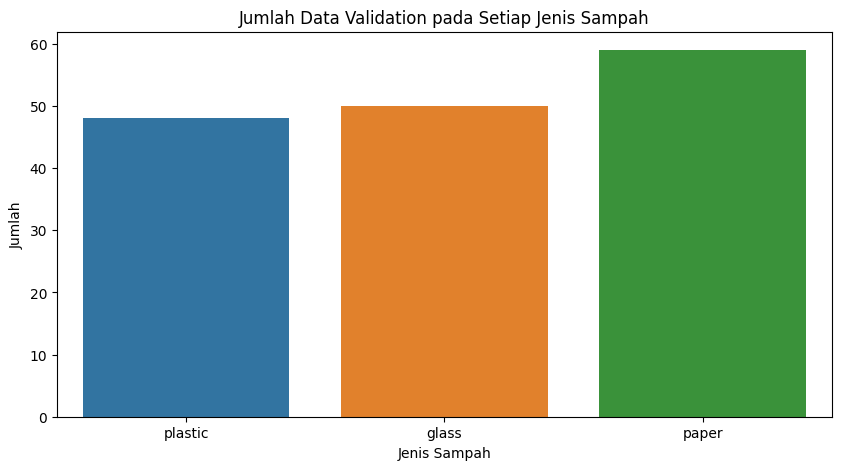

In [17]:
plt.figure(figsize = (10,5))

sns.countplot(x = labels)
plt.title("Jumlah Data Validation pada Setiap Jenis Sampah")
plt.xlabel("Jenis Sampah")
plt.ylabel("Jumlah")
plt.show()

# Data Modelling

## A. Arsitektur Model

In [18]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(3, activation='softmax')
])


## B. Parameter Layer

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0

## C. Konfigurasi Model

### 1. Optimasi Model

In [20]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ["accuracy"]
)

### 2. Callback

In [21]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 1e-4):
            self.model.stop_training = True
            
cb = myCallback()

## D. Training Model

In [23]:
hasil = model.fit_generator(train_generator, 
                    validation_data=test_generator, 
                    epochs=60, 
                    verbose = 1,  
                    callbacks = cb)

C:\Users\ACER\AppData\Local\Temp\ipykernel_17728\2447533263.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hasil = model.fit_generator(train_generator,


Epoch 1/60
9/9 [==============================] - 10s 1s/step - loss: 0.5808 - accuracy: 0.7368 - val_loss: 0.6782 - val_accuracy: 0.7421
Epoch 2/60
9/9 [==============================] - 8s 911ms/step - loss: 0.4387 - accuracy: 0.8113 - val_loss: 0.5422 - val_accuracy: 0.7862
Epoch 3/60
9/9 [==============================] - 9s 928ms/step - loss: 0.3818 - accuracy: 0.8466 - val_loss: 0.5124 - val_accuracy: 0.8019
Epoch 4/60
9/9 [==============================] - 9s 929ms/step - loss: 0.3471 - accuracy: 0.8575 - val_loss: 0.5316 - val_accuracy: 0.7956
Epoch 5/60
9/9 [==============================] - 9s 932ms/step - loss: 0.3491 - accuracy: 0.8684 - val_loss: 0.4597 - val_accuracy: 0.8208
Epoch 6/60
9/9 [==============================] - 8s 954ms/step - loss: 0.3500 - accuracy: 0.8593 - val_loss: 0.5111 - val_accuracy: 0.7925
Epoch 7/60
9/9 [==============================] - 9s 929ms/step - loss: 0.3742 - accuracy: 0.8412 - val_loss: 0.5412 - val_accuracy: 0.7925
Epoch 8/60
9/9 [======

# Evaluasi

## A. Evaluasi Test Set

In [24]:
score = model.evaluate(test_generator, verbose=1)
print(f'Test Loss    : {round(score[0] * 100,2)} %')
print(f'Test Akurasi : {round(score[1] * 100,2)} %')

SyntaxError: invalid non-printable character U+00A0 (323255741.py, line 3)

## B. Visualisasi Hasil Training (Train dan Validation)

### 1. Membandingkan perkembangan epoch Train vs. Validation Accuracy

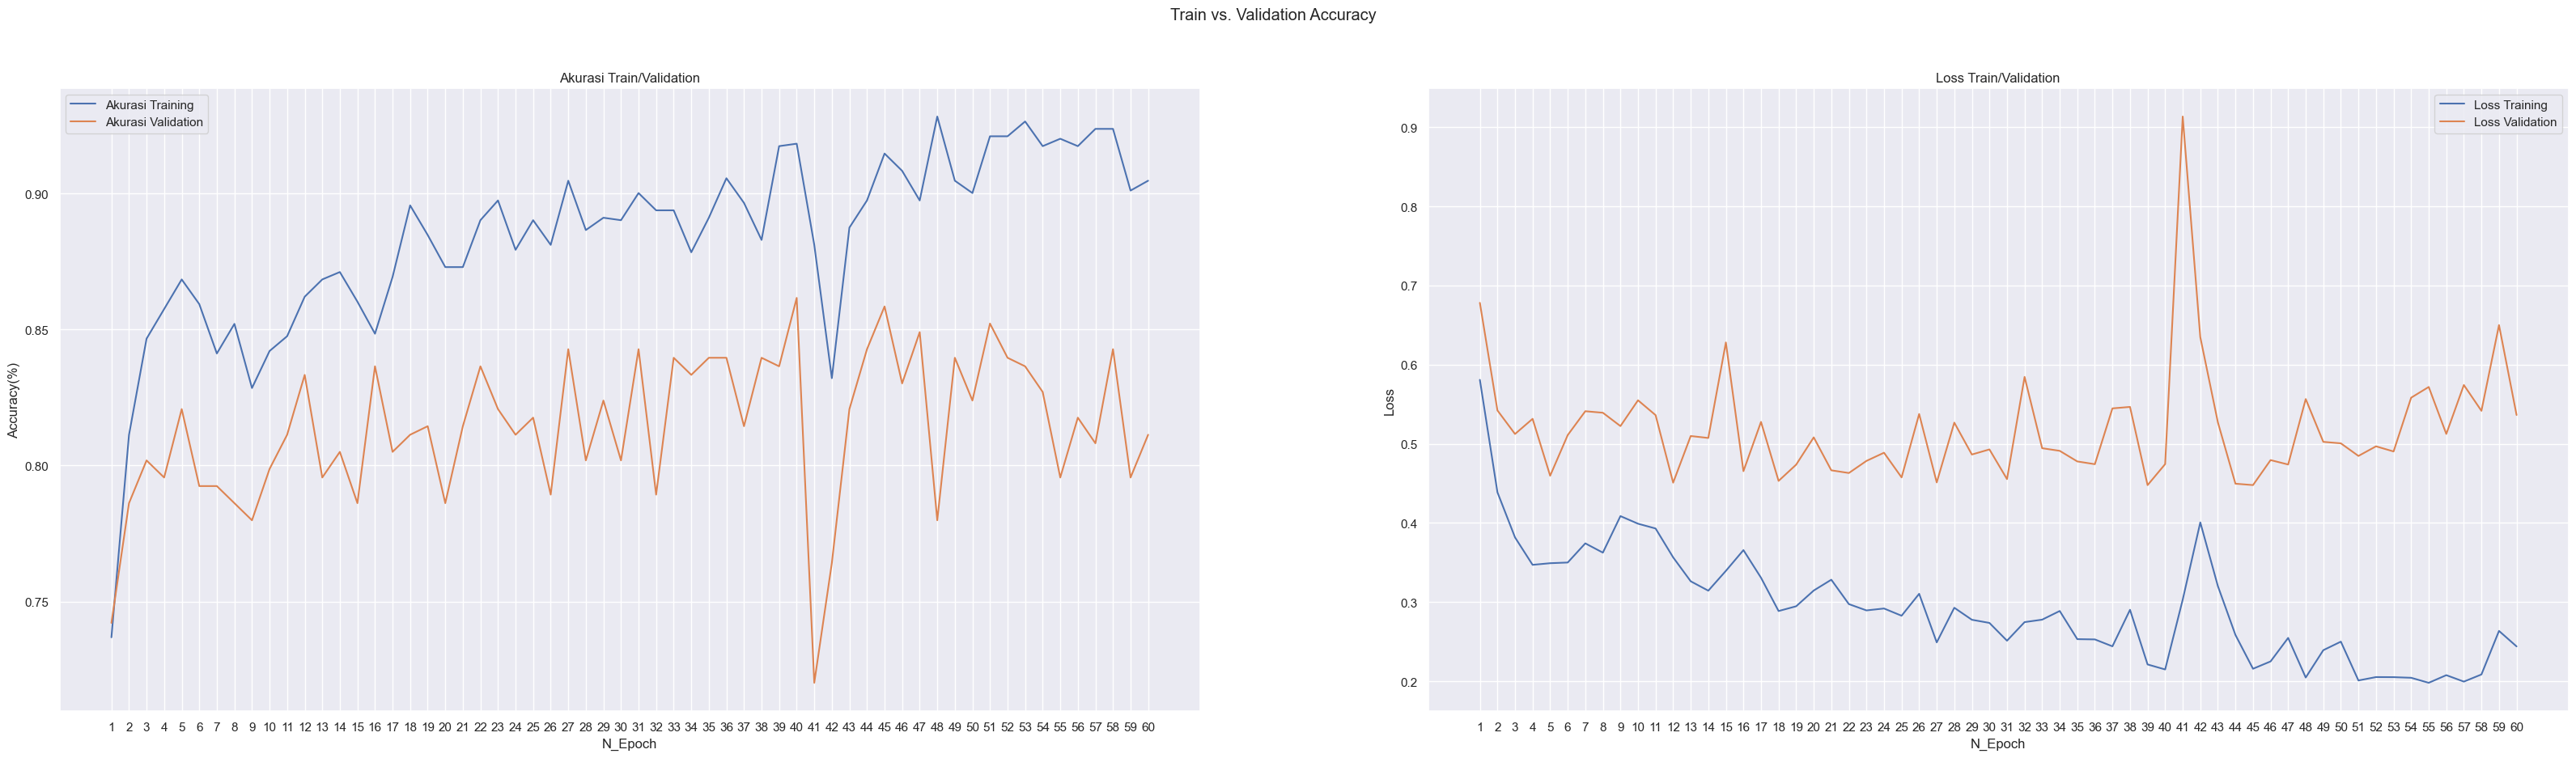

In [25]:
epoch = [i+1 for i in range(60)]

sns.set_theme()

plt.figure(figsize = (40,10))
plt.suptitle('Train vs. Validation Accuracy')

# Subplot Akurasi
plt.subplot(1, 2, 1)
sns.lineplot(x = epoch, y = hasil.history['accuracy'], label = 'Akurasi Training')
sns.lineplot(x = epoch, y = hasil.history['val_accuracy'], label = 'Akurasi Validation')

plt.xticks(epoch)
plt.xlabel('N_Epoch')
plt.ylabel('Accuracy(%)')
plt.title('Akurasi Train/Validation')

#Subplot Loss
plt.subplot(1, 2, 2)
sns.lineplot(x = epoch, y = hasil.history['loss'], label = 'Loss Training')
sns.lineplot(x = epoch, y = hasil.history['val_loss'], label = 'Loss Validation')

plt.xticks(epoch)
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.title('Loss Train/Validation')

plt.show()

## C. Pratinjau Prediksi

### 1. Pratinjau Hasil Prediksi"

* ### Visualisasi Gambar yang Diprediksi Benar"

1/1 [==============================] - 0s 34ms/step


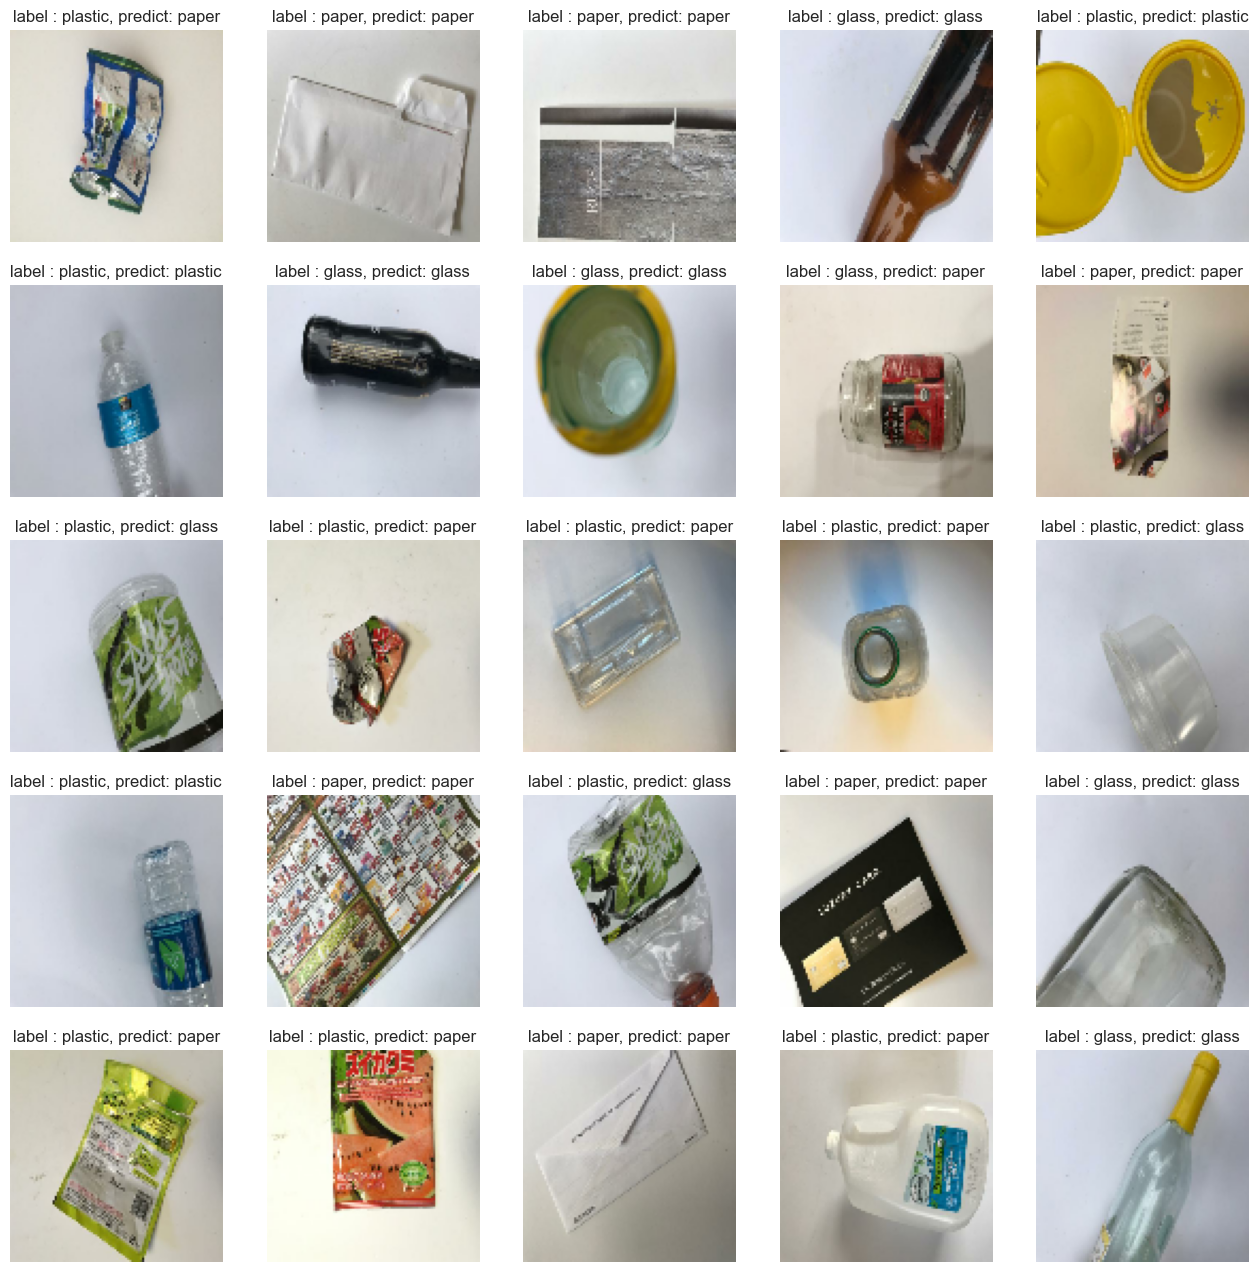

In [26]:
image, label = next(iter(dataset_test))

plt.figure(figsize = (16, 16))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None, ...]))
    plt.imshow(tf.squeeze(image[i].numpy().astype("uint8")), cmap = 'gray')
    plt.title(f'label : {class_names[label[i]]}, predict: {class_names[y_pred]}')

### 2. Pratinjau Kesalahan Prediksi

* ### Visualisasi Gambar yang Diprediksi Salah

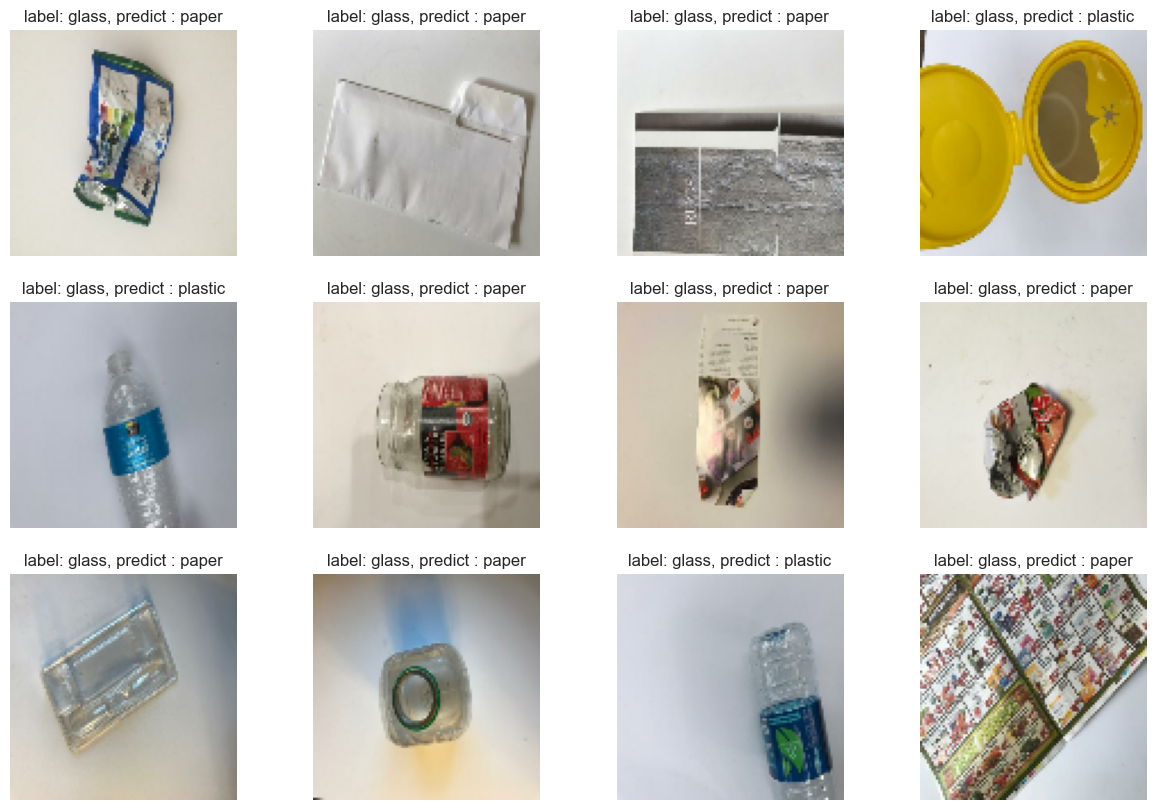

In [27]:
plt.figure(figsize=(15,10))

i, j = 0, 0
while (j < 12):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,4,j +1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))

    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i].numpy().astype("uint8")),cmap='gray')
        plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')
        j+=1
    i+=1

## D. Simpan Model

In [ ]:
model.save('Hasil_Dataset.h5')